In [1]:
import matplotlib.pyplot as plt
import cv2
from paddleocr import PaddleOCR
import os
import re

In [2]:
ocr = PaddleOCR(
    use_doc_orientation_classify=False,
    use_doc_unwarping=False,
    use_textline_orientation=False
)

/home/namtt/miniconda3/envs/trafic_detection/lib/python3.10/site-packages/paddle/utils/cpp_extension/extension_utils.py:718: UserWarning: No ccache found. Please be aware that recompiling all source files may be required. You can download and install ccache from: https://github.com/ccache/ccache/blob/master/doc/INSTALL.md
  warnings.warn(warning_message)
Creating model: ('PP-OCRv5_server_det', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/home/namtt/.paddlex/official_models/PP-OCRv5_server_det`.
Creating model: ('PP-OCRv5_server_rec', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/home/namtt/.paddlex/official_models/PP-OCRv5_server_rec`.


In [3]:
CONFUSIONS_TO_NUMBER = {
    'B': '8',
    'G': '6',
    'Z': '2',
    'S': '5',
    'O': '0',
    'I': '1',
}

CONFUSIONS_TO_LETTER = {
    '8': 'B',
    '6': 'G',
    '9': 'B',
    '2': 'Z',
    '5': 'S',
    '0': 'O',
    '1': 'I',
}

def correct_char(char, must_be_letter=False):
    if must_be_letter:
        return CONFUSIONS_TO_LETTER.get(char, char)
    else:
        return CONFUSIONS_TO_NUMBER.get(char, char)

def post_process_license_plate(raw_text):
    clean_text = re.sub(r'[^A-Z0-9]', '', str(raw_text).upper())
    # if len(clean_text) != 9:
    #     return clean_text 

    corrected_chars = []
    
    template = "NNLNNNNNNN"

    for i, char in enumerate(clean_text):
        must_be_letter = (template[i] == 'L')
        corrected_chars.append(correct_char(char, must_be_letter))

    return "".join(corrected_chars)

In [12]:
def plot_result(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    result = ocr.predict(img)[0]
    label = ""
    if result["rec_texts"] is not None:
        for text in result["rec_texts"]:
            label += text
    label = post_process_license_plate(label)
    plt.imshow(img)
    plt.title(label)
    plt.show()

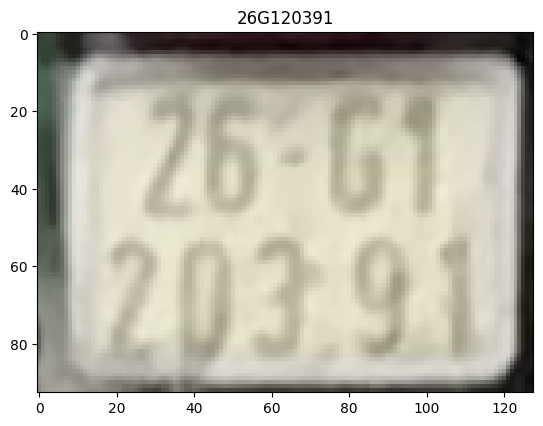

KeyboardInterrupt: 

In [13]:
data_path = "data"
for img_name in os.listdir(data_path):
    img_path = f"{data_path}/{img_name}"
    plot_result(img_path)